# Water Potability
## By - Prakhar Jaiswal (21229)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("wp.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
def percent_missing(df):
    percent_nan = 100*df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan >0].sort_values()
    return percent_nan

In [5]:
percent_nan = percent_missing(df)
percent_nan

Trihalomethanes     4.945055
ph                 14.987790
Sulfate            23.840049
dtype: float64

In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# Missing Values Treatment

## 1. ph



In [7]:
x = df[(df['Potability']==0) & (df['Hardness']<=120)][['ph']].mean()
x

ph    6.970072
dtype: float64

In [8]:
y = df[(df['Potability']==0) & (df['Hardness']>120)][['ph']].mean()
y

ph    7.086764
dtype: float64

In [9]:
z = df[(df['Potability']==1) & (df['Hardness']<=120)][['ph']].mean()
z

ph    8.033491
dtype: float64

In [10]:
o = df[(df['Potability']==1) & (df['Hardness']>120)][['ph']].mean()
o

ph    7.054216
dtype: float64

In [11]:
#Filling null values of ph column
for i in range (0,len(df)):
    if (pd.isnull(df['ph'][i]) == True):
        if ((df['Potability'][i]==0) & (df['Hardness'][i]<=120)):
            df['ph'][i] = x
        elif ((df['Potability'][i]==0) & (df['Hardness'][i]>120)):
            df['ph'][i] = y
        elif ((df['Potability'][i]==1) & (df['Hardness'][i]<=120)):
             df['ph'][i] = z
        else:
             df['ph'][i] = o

C:\Users\Prakhar Jaiswal\AppData\Local\Temp\ipykernel_33408\3643069641.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ph'][i] = y
C:\Users\Prakhar Jaiswal\AppData\Local\Temp\ipykernel_33408\3643069641.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ph'][i] = x
C:\Users\Prakhar Jaiswal\AppData\Local\Temp\ipykernel_33408\3643069641.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ph'][i] = o
C:\Users\Prakhar Jais



# 2. Sulfate

In [12]:
x = df[(df['Potability']==0)][['Sulfate']].mean()
x

Sulfate    334.56429
dtype: float64

In [13]:
y = df[(df['Potability']==1)][['Sulfate']].mean()
y

Sulfate    332.56699
dtype: float64

In [14]:
#Filling null values of Sulfate column
for i in range (0,len(df)):
    if (pd.isnull(df['Sulfate'][i]) == True):
        if (df['Potability'][i]==0):
            df['Sulfate'][i] = x
        else:
             df['Sulfate'][i] = y

C:\Users\Prakhar Jaiswal\AppData\Local\Temp\ipykernel_33408\2441404855.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sulfate'][i] = x
C:\Users\Prakhar Jaiswal\AppData\Local\Temp\ipykernel_33408\2441404855.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sulfate'][i] = y


# 3. Trihalomethanes

In [15]:
df['Trihalomethanes'].fillna(value = df['Trihalomethanes'].mean() , inplace = True)

In [16]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [17]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.086764,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Data Visualization

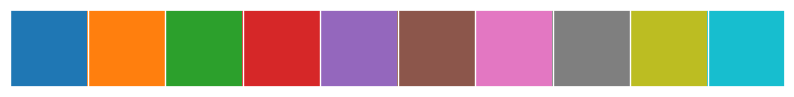

In [18]:
colors = sns.color_palette('tab10')[0:10]
sns.set(style="darkgrid")
sns.palplot(colors)

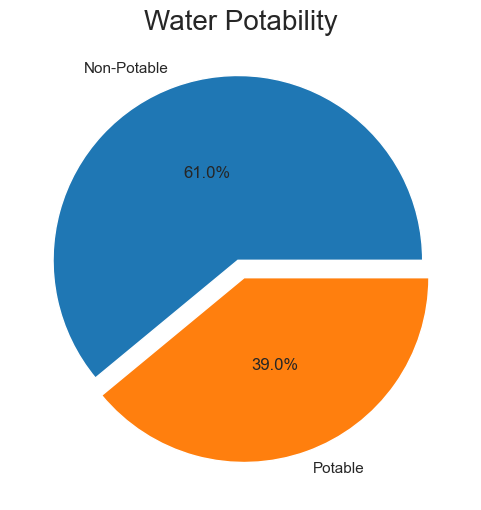

In [19]:
labels = ['Non-Potable', 'Potable']
data = [df['Potability'].value_counts()[0],
         df['Potability'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots(figsize=[15,6])
ax1.pie(data, labels=labels,explode=[0.05]*2, autopct='%1.1f%%',pctdistance=0.5, colors = colors)
plt.title("Water Potability", fontsize=20);
plt.show()


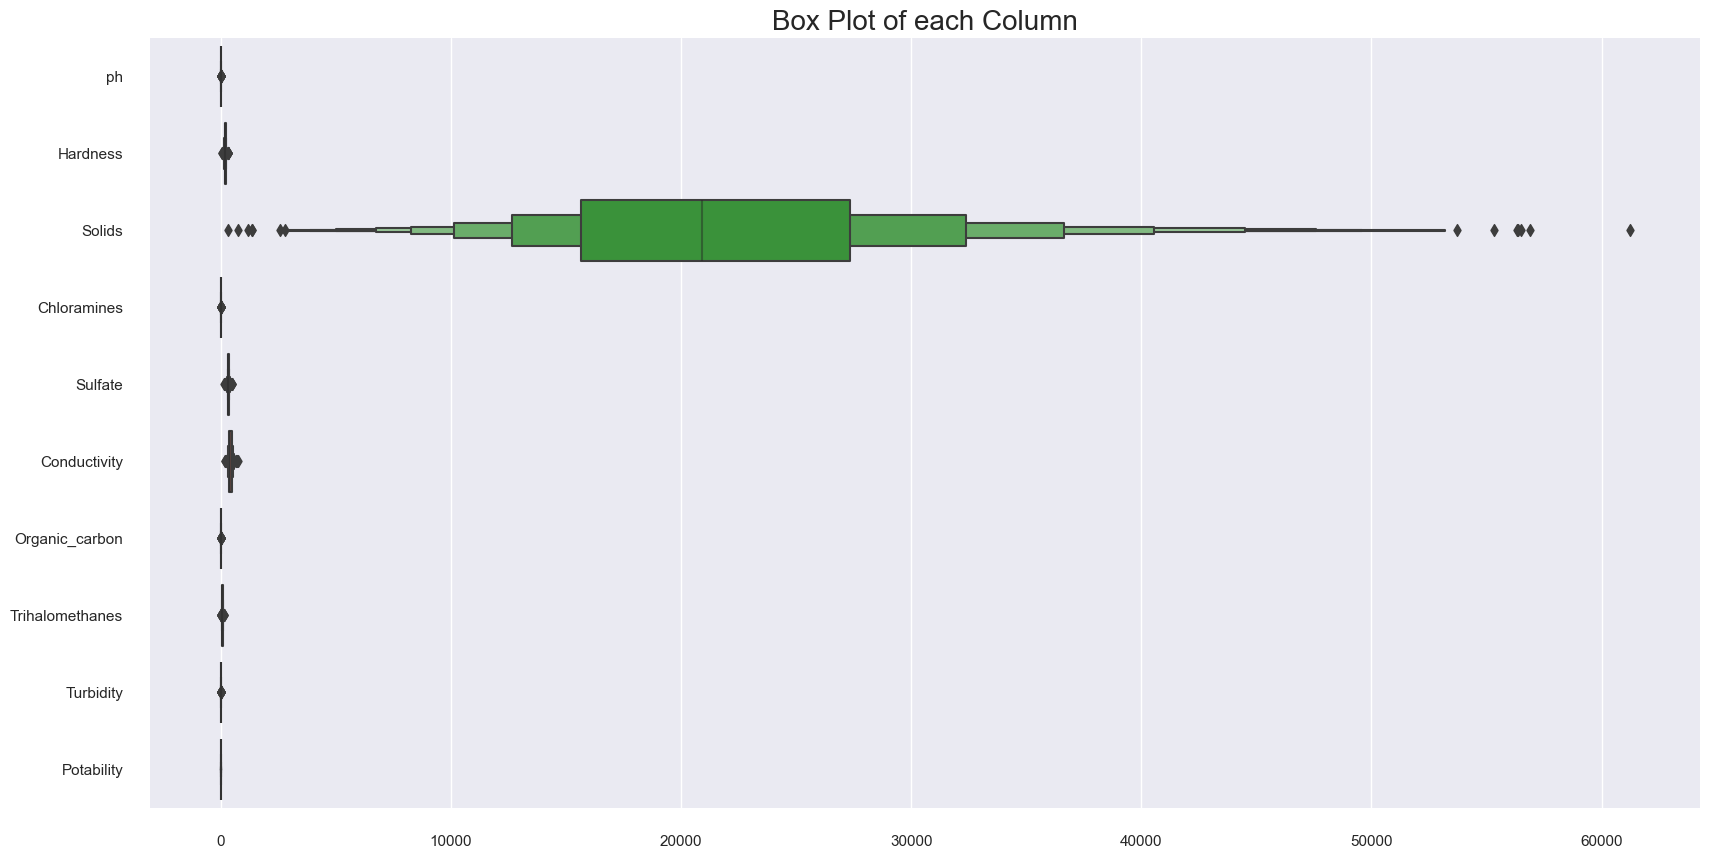

In [20]:
fig1, ax = plt.subplots(figsize=[20,10])
ax = sns.boxenplot(data=df, orient="h",palette = colors)
sns.despine(offset=10, trim=True)
plt.title("Box Plot of each Column", fontsize=20);
plt.show()

C:\Users\Prakhar Jaiswal\AppData\Local\Temp\ipykernel_33408\2907001967.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop("Solids",1)


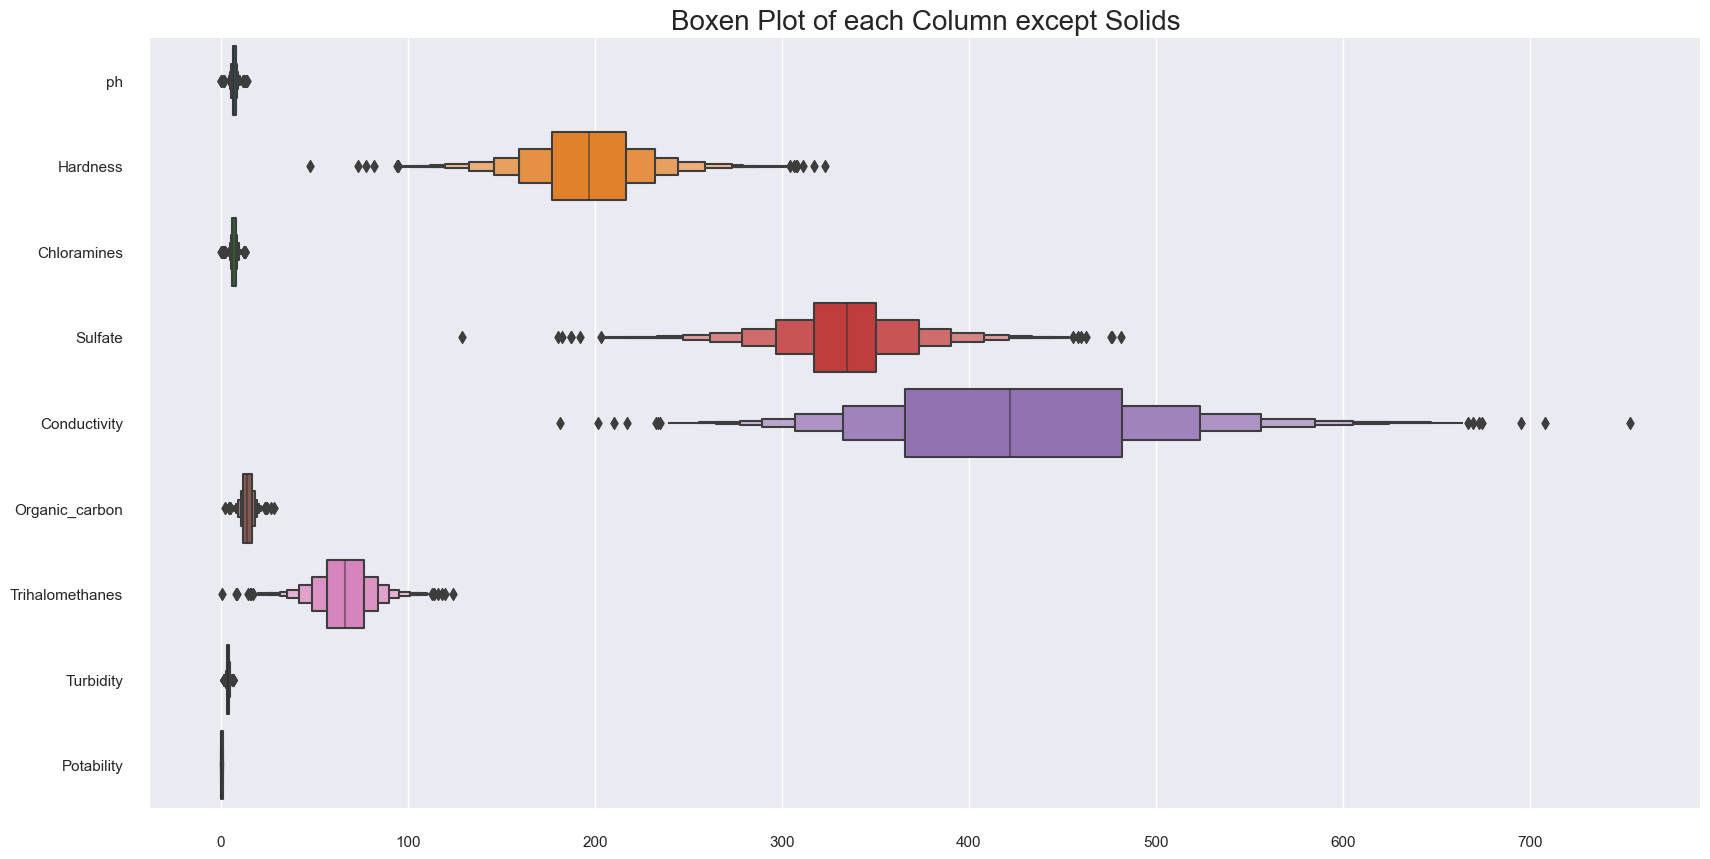

In [21]:
#Boxen Plot of each Column except Solids
df1 = pd.DataFrame()
df1 = df
df1 = df1.drop("Solids",1)
fig1, ax = plt.subplots(figsize=[20,10])
ax = sns.boxenplot(data=df1, orient="h", palette=colors)
sns.despine(offset=10, trim=True)
plt.title("Boxen Plot of each Column except Solids", fontsize=20);
plt.show()

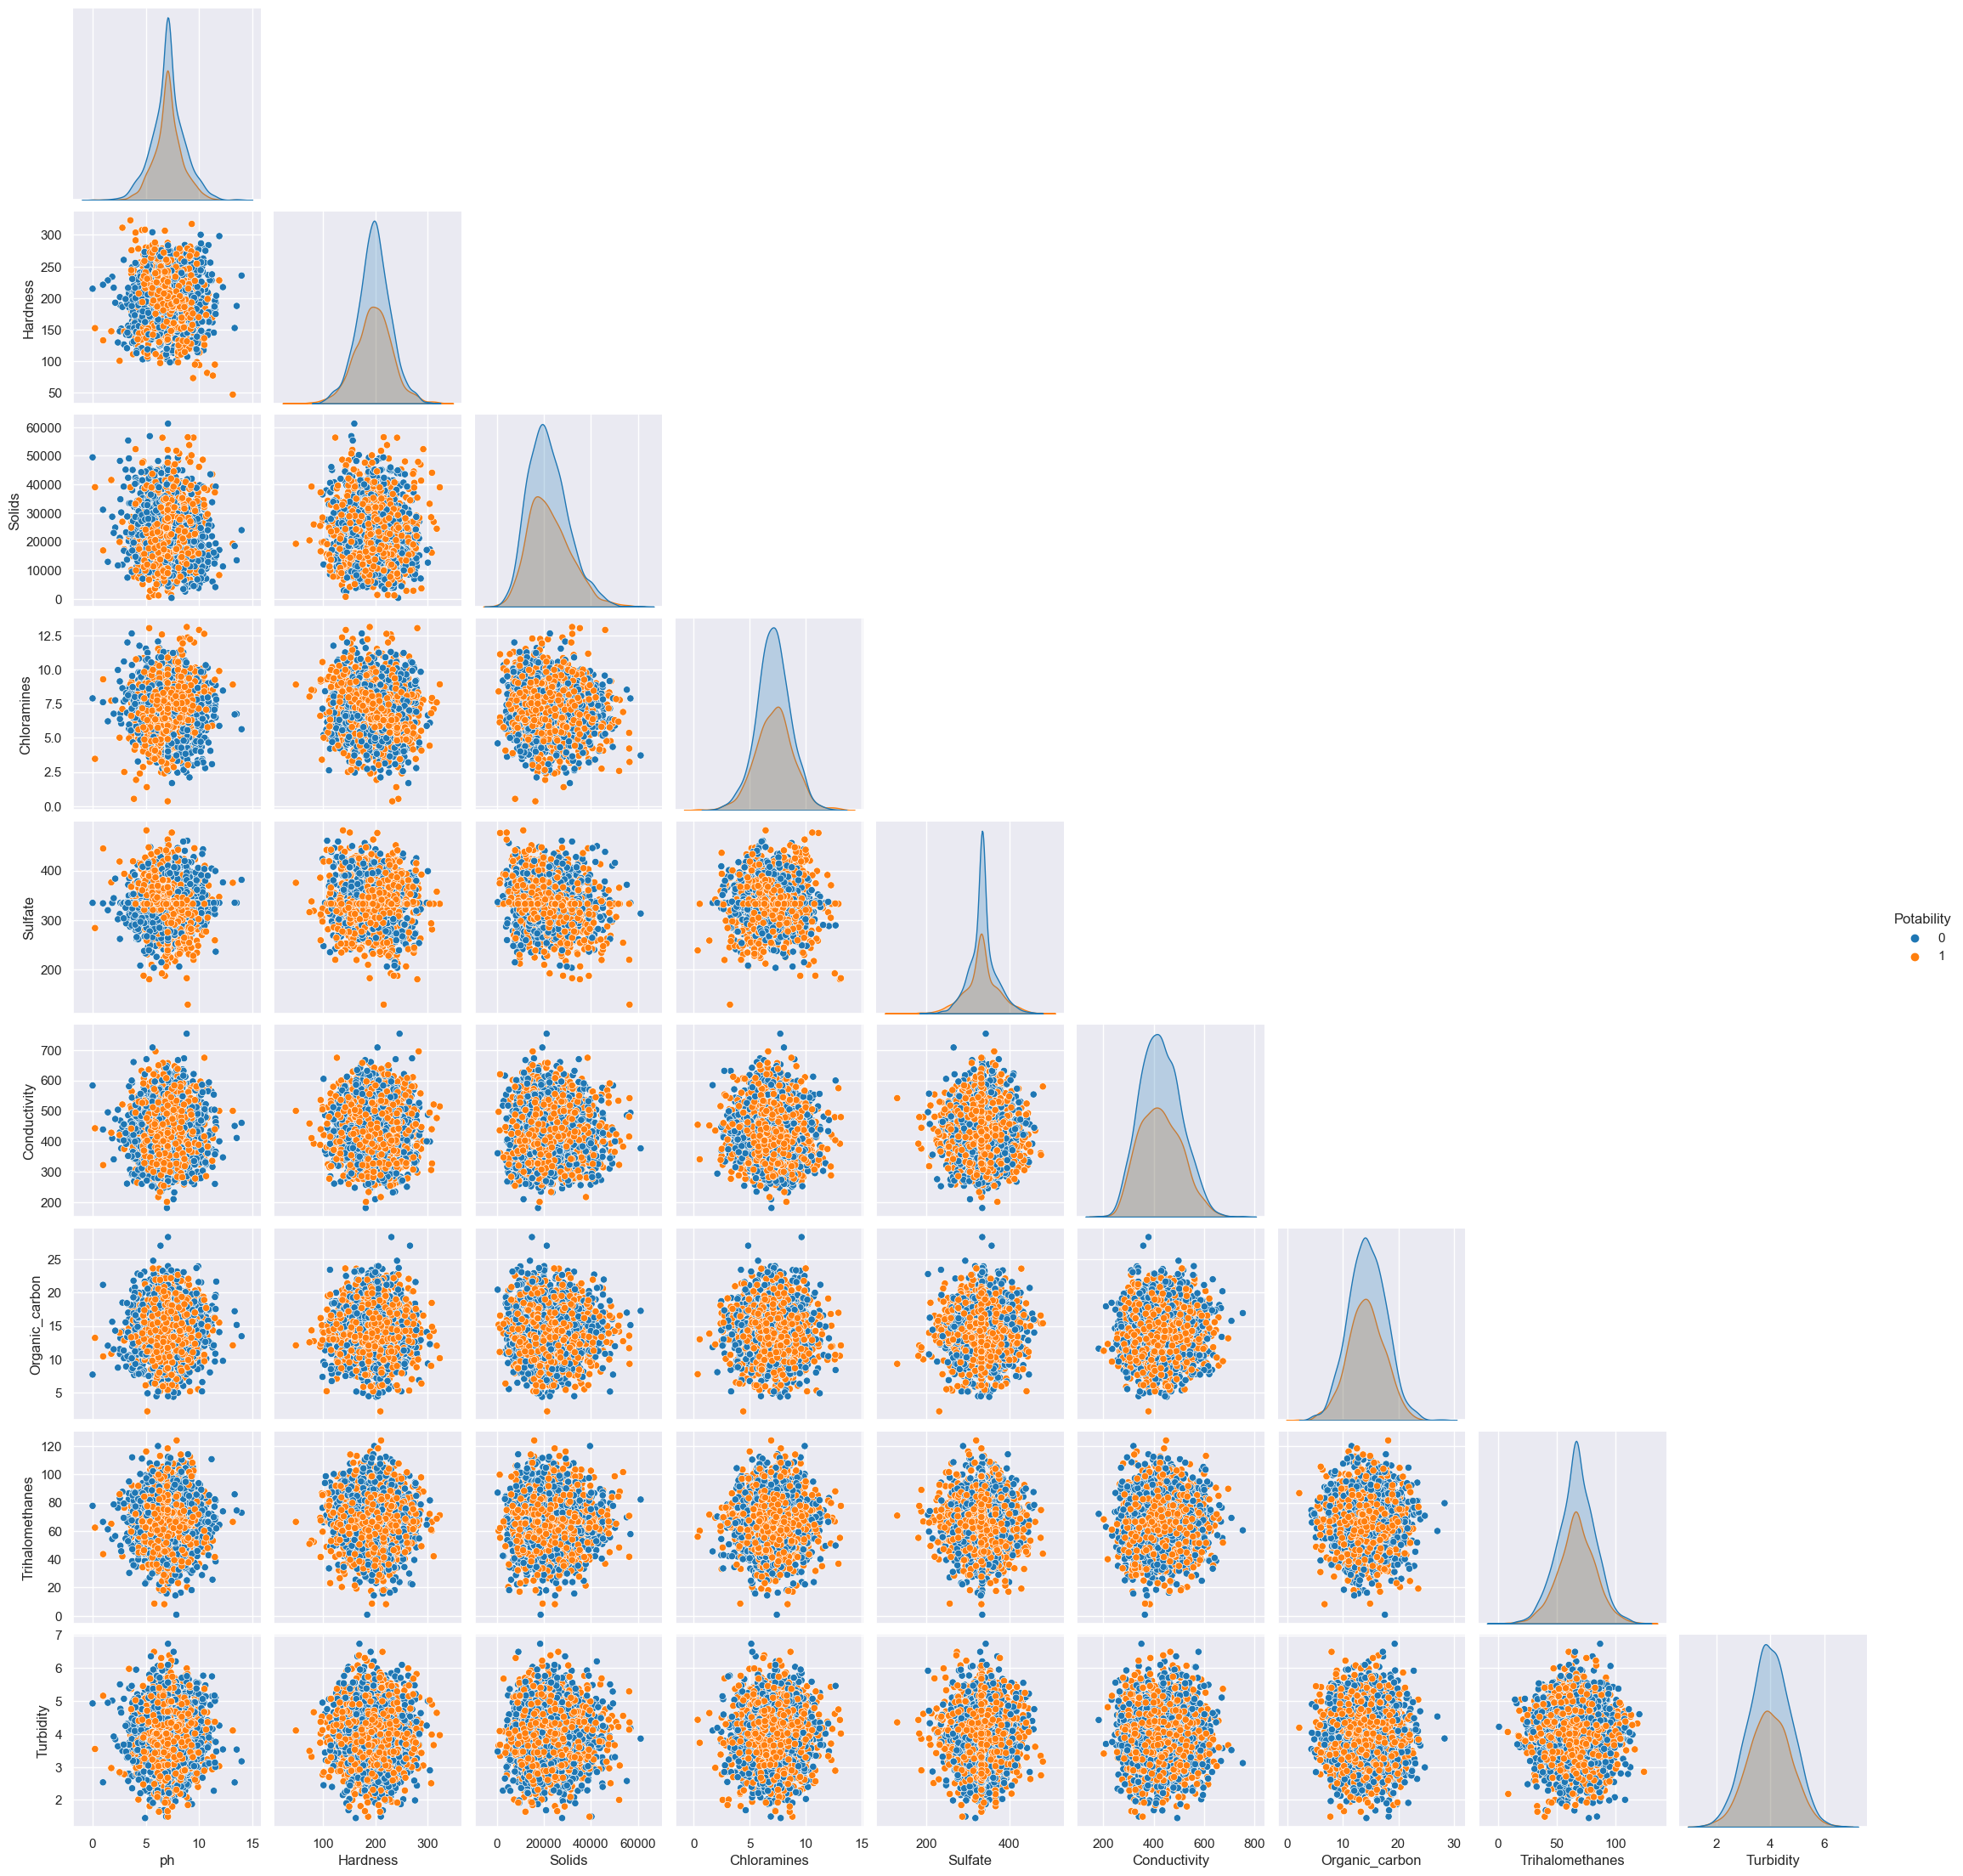

In [22]:
ax = sns.pairplot(df, hue="Potability",diag_kind="kde",palette="tab10",corner=True)
plt.show()

<AxesSubplot:>

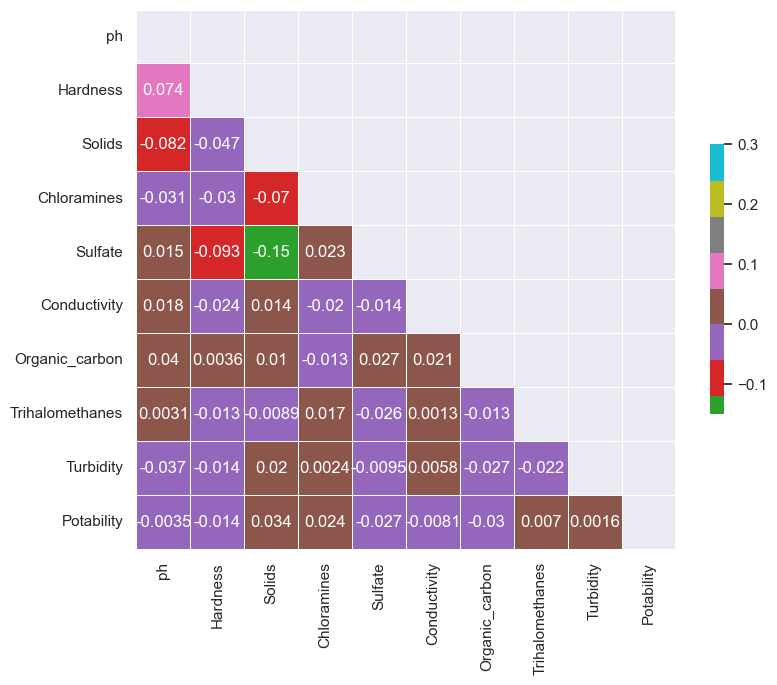

In [23]:
#Heat Map
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(9, 7))

sns.heatmap(corr, mask=mask, cmap="tab10", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot =True)

## Implementing Various SML Algorithm 

In [24]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.086764,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [25]:
# data = pd.get_dummies(df, columns = ['Type of Water', 'Type of Hardness'])
# data.head()

In [26]:
X = df.drop(['Potability'], axis = 1)
Y = df['Potability']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC, LinearSVC

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.75, random_state=83)

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Logistic Regression

1. Logistic regression is a useful regression method for solving the binary classification problems.
2. It's another category of classification in Multinomial classification, which handles the issues where multiple classes are present in the target variable.

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [31]:
logreg.score(X_train, y_train)

0.6227106227106227

In [67]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1334,  176],
       [ 817,  130]], dtype=int64)

Text(0.5, 20.049999999999997, 'Predicted label')

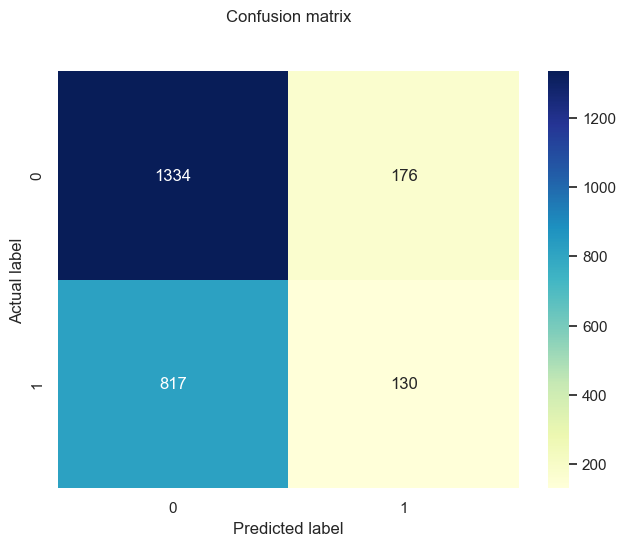

In [34]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
target_names = ['Potable', 'Not Potable']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Potable       0.62      0.88      0.73      1510
 Not Potable       0.42      0.14      0.21       947

    accuracy                           0.60      2457
   macro avg       0.52      0.51      0.47      2457
weighted avg       0.54      0.60      0.53      2457



# Decision Tree

1. A decision tree is a flowchart-like tree structure where an internal node represents feature, the branch represents a decision rule, and each leaf node represents the outcome.
2. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. 

In [36]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
decision_tree.score(X_train, y_train)

1.0

In [69]:
y_pred = decision_tree.predict(X_test)

In [39]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1009,  501],
       [ 443,  504]], dtype=int64)

Text(0.5, 20.049999999999997, 'Predicted label')

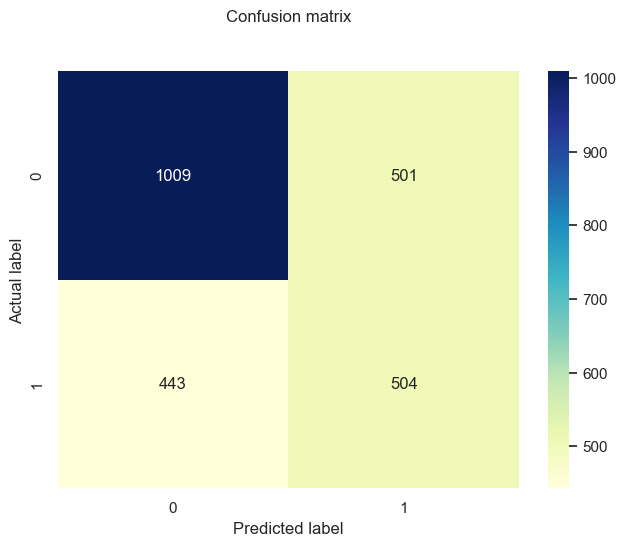

In [40]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [41]:
target_names = ['Potable', 'Not Potable']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Potable       0.69      0.67      0.68      1510
 Not Potable       0.50      0.53      0.52       947

    accuracy                           0.62      2457
   macro avg       0.60      0.60      0.60      2457
weighted avg       0.62      0.62      0.62      2457



# Random Forest

In [42]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)


random_forest.score(X_train, y_train)

1.0

In [43]:
y_pred = random_forest.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [44]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1187,  323],
       [ 403,  544]], dtype=int64)

Text(0.5, 20.049999999999997, 'Predicted label')

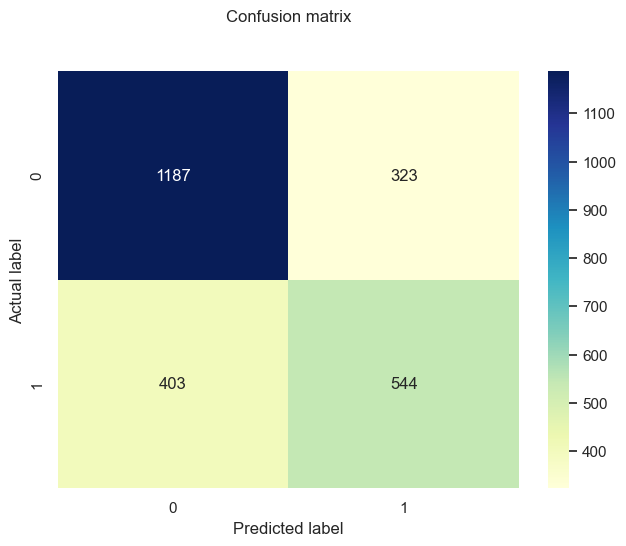

In [45]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [46]:
target_names = ['Potable', 'Not Potable']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Potable       0.75      0.79      0.77      1510
 Not Potable       0.63      0.57      0.60       947

    accuracy                           0.70      2457
   macro avg       0.69      0.68      0.68      2457
weighted avg       0.70      0.70      0.70      2457



# KNN

In [47]:
for i in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn,X_train,y_train)
    print(i,score.mean())

1 0.5677165943438576
3 0.5738440819991022
5 0.597104593745324
7 0.6044216669160556
9 0.6129582522819093
11 0.627637288642825
13 0.6166167888672752
15 0.6117537034266047
17 0.6227293131827023
19 0.6215172826574891
21 0.6166167888672751
23 0.6178363010623971
25 0.6153823133323357
27 0.6190408499177017
29 0.617813856052671
31 0.6287894658087685
33 0.626342959748616
35 0.6324255573844082
37 0.6385530450396528
39 0.6458626365404758
41 0.6385455633697441
43 0.634894508454287
45 0.6202453987730061
47 0.6202453987730061
49 0.6239263803680981


In [48]:
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [49]:
knn.score(X_test, y_test)

0.6398046398046398

In [50]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [51]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1374,  136],
       [ 749,  198]], dtype=int64)

Text(0.5, 20.049999999999997, 'Predicted label')

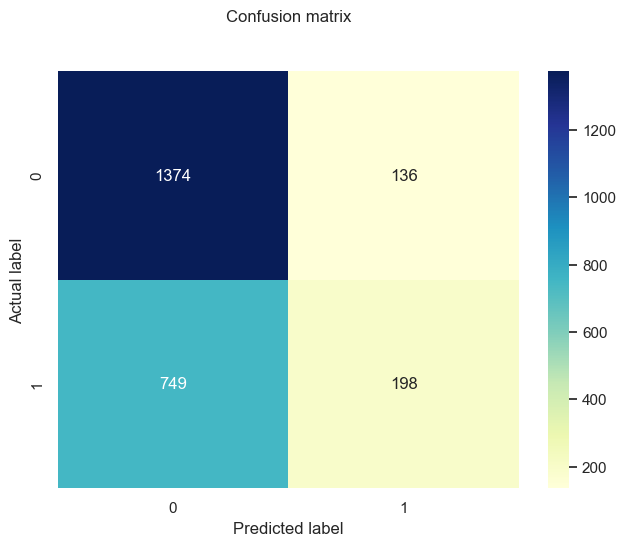

In [52]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [53]:
target_names = ['Potable', 'Not Potable']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Potable       0.65      0.91      0.76      1510
 Not Potable       0.59      0.21      0.31       947

    accuracy                           0.64      2457
   macro avg       0.62      0.56      0.53      2457
weighted avg       0.63      0.64      0.58      2457



# SVM

In [54]:
svc = SVC(kernel='rbf', C=1)
svc.fit(X_train, y_train)

svc.score(X_train, y_train)

0.7606837606837606

In [55]:
y_pred = svc.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [56]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1307,  203],
       [ 645,  302]], dtype=int64)

Text(0.5, 20.049999999999997, 'Predicted label')

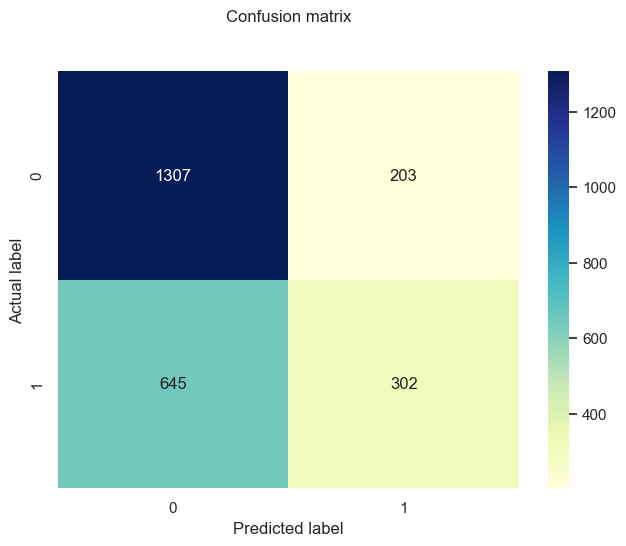

In [57]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [58]:
target_names = ['Potable', 'Not Potable']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Potable       0.67      0.87      0.76      1510
 Not Potable       0.60      0.32      0.42       947

    accuracy                           0.65      2457
   macro avg       0.63      0.59      0.59      2457
weighted avg       0.64      0.65      0.62      2457



In [59]:
import pickle
filename = 'watermodel.sav'
pickle.dump(random_forest,open(filename,'wb'))

In [88]:
loaded_model=pickle.load(open('watermodel.sav','rb'))

input_data = (6.80011909,242.0080815,39143.40333,9.501694588,187.1707144,376.4565931,11.43246635,73.77727503,3.8549399)
as_numpyarray = np.asarray(input_data)
reshaped = as_numpyarray.reshape(1,-1)
prediction = loaded_model.predict(reshaped)
print(prediction)

[0]


In [61]:
mean_d = pd.pivot_table(df,index=['Potability'],aggfunc='mean')
mean_d

,Chloramines,Conductivity,Hardness,Organic_carbon,Solids,Sulfate,Trihalomethanes,Turbidity,ph
Potability,,,,,,,,,
0,7.092175,426.730454,196.733292,14.364335,21777.490788,334.56429,66.308522,3.965800,7.085304
1,7.169338,425.383800,195.800744,14.160893,22383.991018,332.56699,66.533513,3.968328,7.074904
